<h1><center><strong><font color="chillipepper">Lab Session 1: An Introduction to Textual Data</font></strong></center></h1>
<h3><center><font color="green"><strong>Correction</strong></font></center></h3>


------------------------

# Overview

Before machine learning algorithms, NLP is all about data: data types, data distribution, data preparation, data representation.

## Course takeaways

- The Why of NLP
- What is NLP ? the four challenges of NLP
- NLP in two pipelines
- Data exploration and preparation

## Lab session Prerequisites

- Python 
- Pandas 

For those not familiar with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

## Lab session in a nutshell 

- First step with a textual dataset 
- Basic Tokenization (Word Segmentation) of a dataset 
- Compute Vocabulary and Zipf's law
- Introduction to Regex 
- A basic comparison of two datasets
- Hands on some processing tools (POS, NER, parsing) 
- A glimpse of topic models 

## Resources: 

- NLTK: https://www.nltk.org/api/nltk.tokenize.html 
- PANDAS: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
- SPACY: https://spacy.io/usage/spacy-101 

## Databases: 

We will use the following databases:
1. [BBC News Classification dataset](https://www.kaggle.com/c/learn-ai-bbc/overview): a corpus that we will download from our gitlab (so you don't have to register to kaggle) and extract manually
2. [Amazon Review dataset](https://huggingface.co/datasets/amazon_reviews_multi): a multilingual corpus that we will retrieve from the [Datasets](https://huggingface.co/datasets) library

## Tasks

### 1. Basic preprocessing
1.1 Open the database. Generate simple statistics about the articles. How many unique articles are there? What is the mean length of articles (considering characters)? 

1.2 Generate simple statistics about the annotators' data for each article. Do the annotations seem consistent? 

### 2. Word-level preprocessing
2.1 Split the articles into list of words. How many different words are there in the vocabulary? 

2.2 Split the articles into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?

2.3 Check if Zipf's law applies. 

### 3. Domain specificity and regex
3.1 Use regex to retrieve numbers (ints, floats, %, years, ...) using a regex. 

3.2 How many percent of characters are numbers (as defined above) in a given article? 

3.3 Is there any relationship between the percentage of numbers in an article and the content length? 

### 4. Dataset Comparison
Merge datasets and compare some basic statistics

### 5. Classic NLP pipeline
5.0 Re-tokenize using spacy

5.1 Lemmatize using spacy

5.2 POS tagging using spacy, plot the trees

5.3 NER using spacy, give the amount of each entity type for a given title, and compare it to the title length. 

### 6. Topic Modelling
6.1 Use Gensim's LDA to compute a topic model. 

6.2 Use PyLDAvis to visualise the topic model. What are the different topic clusters?


# <font color="chillipepper">**Imports and Installation**</font>

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
! pip3 install datasets

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-0.0.dev0-py2.py3-none-any.whl size=328836 sha256=d48c11931eed23119bd55d708ef25db354e7a93feb01e961c14acf6c59e0bce5
  Stored in directory: /tmp/pip-ephem-wheel-cache-385pldg2/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
Successfully built pandas-profiling


  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Attempting uninstall: charset-normalizer
    Found existing installation: charset-normalizer 3.0.1
    Uninstalling charset-normalizer-3.0.1:
      Successfully uninstalled charset-normalizer-3.0.1


In [2]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from functools import reduce
from operator import add
from termcolor import colored


# <font color="chillipepper">**Data Basic Exploration**</font>

We first start by opening the database and load it as a **Pandas dataframe**.

Documentation:
- https://pandas.pydata.org/docs/

In [3]:
df = pd.read_csv('./bbc-news-data.csv', sep='\t')
print("Shape:  {0}".format(df.shape))
df.head()

Shape:  (2225, 4)


category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
2   The owners of embattled Russian oil giant Yuk...  
3   British Airways has blamed high fuel prices f...  
4   Shares in UK drinks and food firm Allied Dome...

Our dataframe have the following columns:

In [4]:
df.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

### 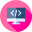 **TODO!** Print the number of different articles in the database.

Tip: You may need the `.unique()` function of Pandas.

In [5]:
# Number of different articles in the database
print(len(df.filename.unique()))

511


### 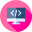 **TODO!** print the mean length (*i.e.* number of characters) of the `content` column

Tip: You may need the `.mean()` function of Pandas.

In [6]:
# Mean length of content in characters
df.content.drop_duplicates().apply(len).mean()

2232.1692160611856

### 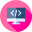 **TODO!** display the different article categories as a list

In [7]:
# display the different article categories
df.category.drop_duplicates().tolist()

['business', 'entertainment', 'politics', 'sport', 'tech']

### 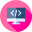 **TODO!** Display the repartition of the content lengths (characters) as an histogram.

Tip: See the `.hist()` function of Pandas.

<AxesSubplot: >

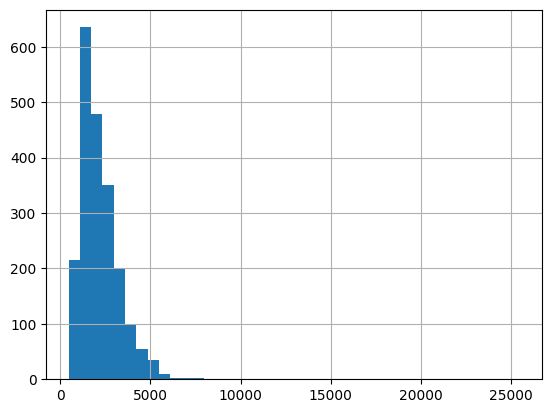

In [8]:
# Repartition of the content lengths (characters)
%matplotlib inline
df.content.drop_duplicates().apply(len).hist(bins=40)

### 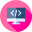 **TODO!** display the number of articles per `category`.

Tip: You may need the `.groupby()` function of Pandas.

In [9]:
# We check the number of article per category
df.drop_duplicates().groupby(df.category).size()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
dtype: int64

### 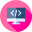 **TODO!** Display the histogram of the number of articles per category

<AxesSubplot: >

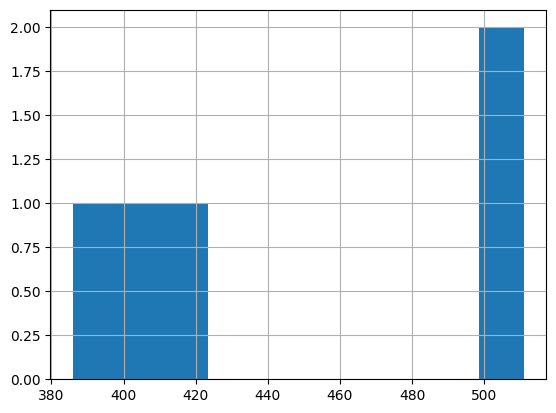

In [10]:
# And plot a histogram
df.drop_duplicates().groupby(df.category).size().hist()

### 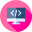 **TODO!** Let's add some basic information about the text: number of "words". Put them into new `title_len` and `content_len` columns. 

Tip: just split the text according to the spaces

In [11]:
# let's add some basic information about the text: number of "words" (here we only split by a space, a really naive approach)
df['title_len'] = df.title.apply(lambda x: len(x.split(' ')) )
df['content_len'] = df.content.apply(lambda x: len(x.split(' ')) )

Here you can see how to display a `ProfileReport()` from PandasProfiling.

Play with it and explore the interactive report.

In [12]:
# Let's create an automatic and interactive report of the BBC News dataset
profile = ProfileReport(df, title="BBC News", html={"style": {"full_width": True}})

In [13]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 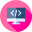 **TODO!** print the standard deviation for each article's title length `title_len` and content length `content_len`.

Tip: you may need the `.std()` function from Pandas

In [14]:
eval_cols = ["title_len", 'content_len']
df.groupby(df.filename)[eval_cols].std()

title_len  content_len
filename                        
001.txt    0.836660   199.297015
002.txt    0.547723   108.580845
003.txt    1.000000   138.855320
004.txt    1.224745   121.730029
005.txt    0.000000   274.165461
...             ...          ...
507.txt    0.707107   164.755880
508.txt    0.707107    63.639610
509.txt    0.000000   160.513239
510.txt    0.707107   123.036580
511.txt         NaN          NaN

[511 rows x 2 columns]

### 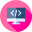 **TODO!** Complete the following code with your solution from previous TODO. This will display the plots for standard deviation distribution of `title_len` and `content_len`.

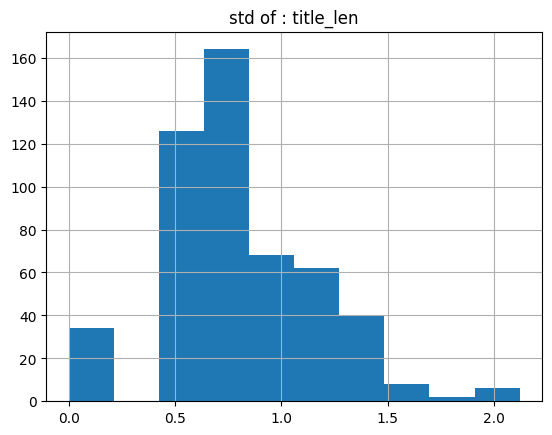

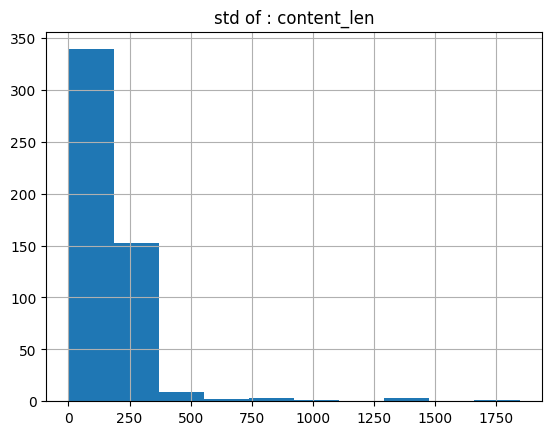

In [15]:
import matplotlib.pyplot as plt

for col in eval_cols:
  plt.figure()
  plt.title("std of : {0}".format(col))
  df.groupby(df.filename)[col].std().hist()
  plt.plot()

# <font color="chillipepper">**Word-level Preprocessing**</font>

### 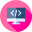 **TODO!** Split the abstracts into list of words. How many different words are there in the vocabulary?

In [16]:
# List of words with separator = " "
arr = df.content.drop_duplicates().apply(lambda x: x.split(' ')).array

# Now we flatten the list of lists into a single level list. Multiple ways:
# I personaly do prefer the list comprehension for efficiency reasons
arr = [ x for X in arr for x in X]
# But some prefer the reduce one
# arr = reduce(add, arr) # Concatenates all lists contained in arr
# Which is equivalent to :
# arr2 = []
# for a in arr:
#   arr2 = arr2 + a
# arr = arr2
print(arr[:5])
print('%s "words" in the contents' % (len(set(arr)) ) )
# the set object transforms a list to the set of unique elements in the list


['', 'Quarterly', 'profits', 'at', 'US']
64779 "words" in the contents


In [17]:
arr = df.title.drop_duplicates().apply(lambda x: x.split(' ')).array
arr = [ x for X in arr for x in X]
print(arr[:5])
print( '%s "words" in the titles' % (len(set(arr))) )

['Ad', 'sales', 'boost', 'Time', 'Warner']
4475 "words" in the titles


### 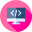 **TODO!** Split the abstracts into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?

In [18]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer
from tqdm.notebook import tqdm

tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]
import pdb # python debugger
for tok in tqdm(tokenizers):
  print('Using tokenizer: %s' % (tok))
  arr = df.content.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # the set object transforms a list to the set of unique elements in the list :
  print('The 30 first tokens: %s' % (arr[:30]) )
  print("Vocabulary size: {0} with {1} tokenizer".format(len(set(arr)), tok))
  print('='*5)  

  0%|          | 0/3 [00:00<?, ?it/s]

Using tokenizer: <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7fcbed83eeb0>
The 30 first tokens: ['Quarterly', 'profits', 'at', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '%', 'to', '$', '1.13bn', '(', '£600m', ')', 'for', 'the', 'three', 'months', 'to', 'December', ',', 'from', '$', '639m', 'year-earlier.', 'The', 'firm', ',']
Vocabulary size: 45705 with <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7fcbed83eeb0> tokenizer
=====
Using tokenizer: <nltk.tokenize.toktok.ToktokTokenizer object at 0x7fcbed83ed30>
The 30 first tokens: ['Quarterly', 'profits', 'at', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '%', 'to', '$', '1.13bn', '(', '£', '600m', ')', 'for', 'the', 'three', 'months', 'to', 'December', ',', 'from', '$', '639m', 'year-earlier.', 'The', 'firm']
Vocabulary size: 45298 with <nltk.tokenize.toktok.ToktokTokenizer object at 0x7fcbed83ed30> tokenizer
=====
Using tokenizer: <nltk.tokenize.casual.TweetTokenizer object at 0x7fcbed83e3d

If you look at the first 30 tokens, the `TweetTokenizer` is the only one to separate "bn" from "1.13" in "1.13bn".

### 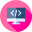 **TODO!** Check if Zipf's law applies.

Complete the following code.

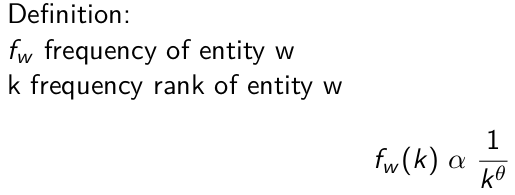

  0%|          | 0/3 [00:00<?, ?it/s]

Counter({'the': 41922, ',': 33355, 'to': 23016, 'of': 18551, 'and': 16858, 'a': 16227, 'in': 15506, '``': 10530, "''": 8756, "'s": 8327, 'is': 8040, 'for': 7949, 'The': 7494, 'that': 7278, 'on': 6681, 'was': 5755, 'said': 5475, 'be': 5359, 'it': 5203, 'with': 4766, 'has': 4674, 'have': 4495, 'as': 4330, 'at': 4112, 'will': 4104, 'he': 4097, 'by': 4066, 'are': 4062, 'I': 3695, '.': 3547, 'not': 3342, 'from': 3242, '-': 3009, 'Mr': 2796, 'his': 2687, 'an': 2544, 'but': 2507, 'would': 2458, 'had': 2447, 'which': 2407, 'been': 2346, 'they': 2323, 'their': 2203, ')': 2114, '(': 2112, 'were': 2066, 'this': 2055, 'its': 2045, 'more': 1987, 'also': 1955, 'It': 1940, 'who': 1935, '%': 1837, 'we': 1790, 'up': 1739, 'people': 1691, 'But': 1690, 'about': 1639, ':': 1568, 'can': 1558, 'He': 1500, 'than': 1499, 'or': 1498, 'after': 1488, 'could': 1431, 'out': 1391, 'one': 1356, 'new': 1353, 'said.': 1328, 'US': 1311, 'year': 1290, 'all': 1234, 'over': 1215, 'do': 1201, 'you': 1177, 'there': 1171, 'l

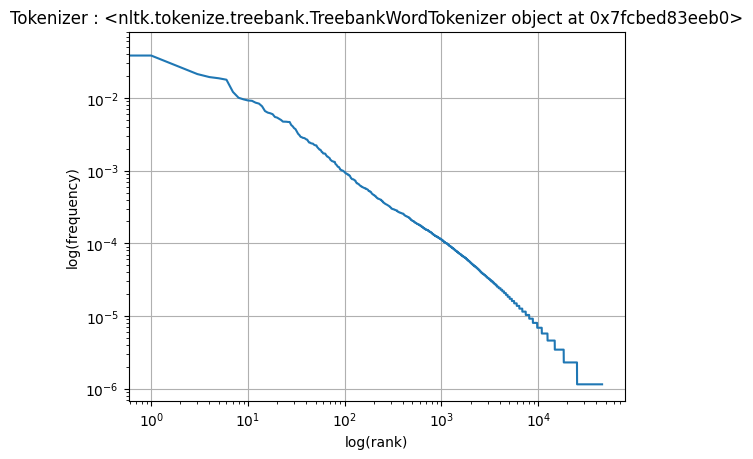

Counter({'the': 41925, ',': 33355, 'to': 23014, '"': 19265, 'of': 18551, 'and': 16858, 'a': 16234, 'in': 15505, "'": 12332, 's': 8329, 'is': 7982, 'for': 7947, 'The': 7496, 'that': 7279, 'on': 6681, 'was': 5693, 'said': 5392, 'be': 5361, 'it': 5200, 'with': 4766, 'has': 4656, 'have': 4451, 'as': 4330, 'at': 4112, 'will': 4105, 'he': 4097, 'by': 4067, 'are': 4042, 'I': 3714, 'from': 3241, 'not': 3182, '-': 3009, 'Mr': 2796, 'his': 2687, 'an': 2545, 'but': 2507, 'had': 2440, 'which': 2407, 'would': 2407, 'been': 2346, 'they': 2323, 'their': 2203, ')': 2114, '(': 2110, '.': 2061, 'this': 2055, 'were': 2050, 'its': 2045, 'more': 1985, 'also': 1955, 'It': 1940, 'who': 1936, '%': 1837, 'we': 1791, 'up': 1740, 'people': 1691, 'But': 1690, 'about': 1639, ':': 1596, 'can': 1523, 'He': 1500, 'than': 1499, 'or': 1499, 'after': 1487, 'said.': 1411, 'could': 1397, 'out': 1389, 'one': 1357, 'new': 1354, '£': 1305, 'US': 1297, 'year': 1267, 'all': 1235, 'over': 1215, 'you': 1181, 'there': 1169, 'last

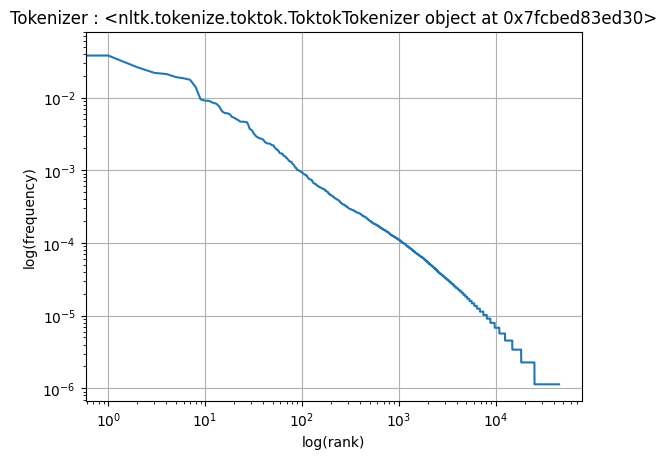

Counter({'the': 41925, '.': 38402, ',': 33363, 'to': 23041, '"': 19265, 'of': 18557, 'and': 16869, 'a': 16233, 'in': 15552, 'is': 8017, 'for': 7973, 'The': 7500, 'that': 7247, 'said': 6803, 'on': 6739, 'was': 5701, 'be': 5389, 'it': 5058, 'with': 4789, 'has': 4658, 'have': 4456, 'as': 4330, 'at': 4116, 'will': 4115, 'by': 4071, 'are': 4055, 'he': 3999, '-': 3616, 'from': 3250, 'not': 3209, 'I': 3096, 'Mr': 2806, 'his': 2691, 'an': 2545, 'but': 2507, 'had': 2448, 'would': 2410, 'which': 2408, 'been': 2348, 'they': 2250, 'their': 2203, 'this': 2100, '(': 2095, ')': 2076, 'were': 2058, 'its': 2045, 'more': 2015, 'also': 1956, 'who': 1930, '%': 1837, 'up': 1794, 'people': 1691, 'But': 1690, 'about': 1654, 'we': 1629, ':': 1563, "'": 1541, 'It': 1521, 'or': 1508, 'than': 1499, 'after': 1489, 'year': 1487, 'out': 1472, 'He': 1454, 'can': 1410, 'could': 1398, 'one': 1393, 'US': 1379, 'new': 1358, '£': 1306, 'all': 1269, 'over': 1249, 'last': 1165, 'there': 1162, 'first': 1156, '$': 1148, 'you

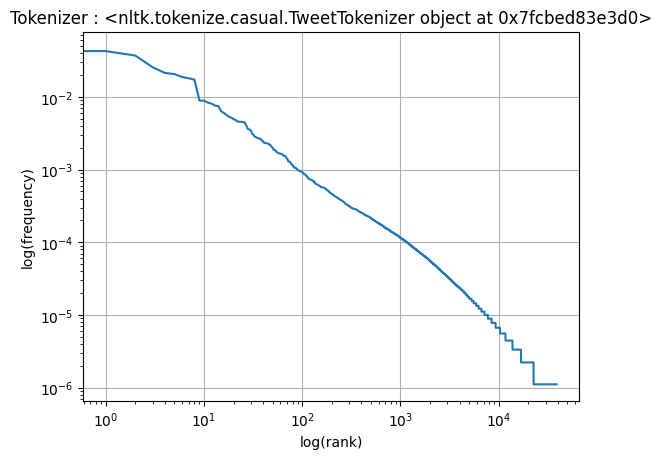

In [19]:
from collections import Counter
import matplotlib.pyplot as plt

for tok in tqdm(tokenizers):
  arr = df.content.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  # We flatten the list. We could use this : arr = reduce(add, arr)   but it would take too much time.
  arr = [ x for X in arr for x in X]
  # We use reduce to concatenate all the lists in arr, but we don't use "set" 
  # so that we can count occurencies with a Counter object 
  c = Counter(arr)
  print(c)
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

# <font color="chillipepper">**Domain specificity and regex**</font>


### 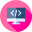 **TODO!** Use regex to retrieve numbers (ints, floats, %, years, ...) in article contents.


*Regex cheasheet* : see python's re module documentation https://docs.python.org/3/library/re.html  

*Other ressources* : 

- A good website to write and test regular expressions : 
https://regex101.com/
- A good game to learn regex : https://alf.nu/RegexGolf 


In [20]:
# See an example of a full article content:
print(df.content.iloc[0])

 Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-spe

In [21]:
import re
# Regular expression that matches any sequence of numbers:
int_prog = re.compile('[0-9]+')
float_prog = re.compile('[0-9]+\.?[0-9]*')
percent_prog = re.compile('[0-9]+\.?[0-9]*%')
year_prog = re.compile('[12][089][0-9][0-9]') # a year between 1800 and 2099. # 1[89][0-9][0-9]|20[0-9][0-9]
df1 = df.drop_duplicates('content')  # Don't forget to compute over unique elements if it applies
# Calculating number of matches for every abstract
progs = [int_prog, float_prog, percent_prog, year_prog]
nb_types = ['ints', 'floats', 'percents', 'years']
for prog, nb_type in zip(progs, nb_types):
  df1[nb_type] = df1['content'].apply(lambda x: len(prog.split(x))-1).array
df1[nb_types].head()

/tmp/ipykernel_36722/3121943855.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: len(prog.split(x))-1).array
/tmp/ipykernel_36722/3121943855.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: len(prog.split(x))-1).array
/tmp/ipykernel_36722/3121943855.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

ints  floats  percents  years
0    30      24         8      4
1     7       5         0      2
2     7       5         0      0
3    37      30         8      4
4    18      11         3      1

### 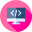 **TODO!** How many percent of characters are numbers (as defined above) in a given article?


In [22]:
nb_percent_types = [''.join([t, '%']) for t in nb_types]
# Don't forget to compute over unique abstracts
df1 = df.drop_duplicates('content')

for prog, nb_type in zip(progs, nb_percent_types):
  df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
df1[nb_percent_types+['content']].head()

/tmp/ipykernel_36722/3117451679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
/tmp/ipykernel_36722/3117451679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
/tmp/ipykernel_36722/3117451679.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

ints%   floats%  percents%    years%  \
0  2.574257  2.811881   0.831683  0.633663   
1  0.585849  0.675980   0.000000  0.360523   
2  0.922874  1.054713   0.000000  0.000000   
3  3.168568  3.464301   1.098437  0.675961   
4  1.628664  2.084691   0.521173  0.260586   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
2   The owners of embattled Russian oil giant Yuk...  
3   British Airways has blamed high fuel prices f...  
4   Shares in UK drinks and food firm Allied Dome...

array([[<AxesSubplot: title={'center': 'ints%'}>,
        <AxesSubplot: title={'center': 'floats%'}>],
       [<AxesSubplot: title={'center': 'percents%'}>,
        <AxesSubplot: title={'center': 'years%'}>]], dtype=object)

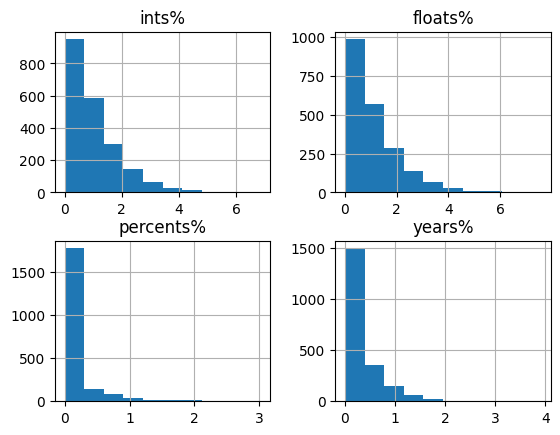

In [23]:
df1[nb_percent_types].hist()

Compute these histograms for each category.

/tmp/ipykernel_36722/3337201609.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
/tmp/ipykernel_36722/3337201609.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
/tmp/ipykernel_36722/3337201609.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

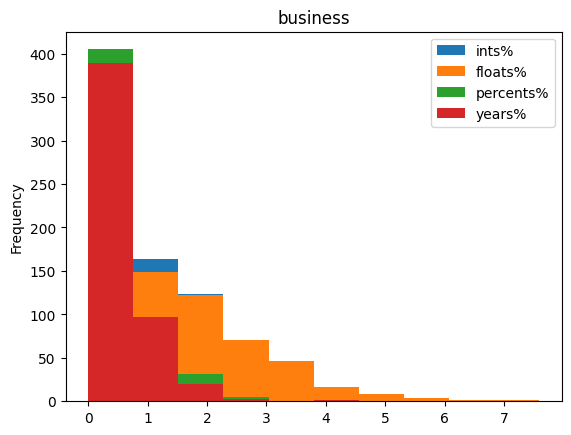

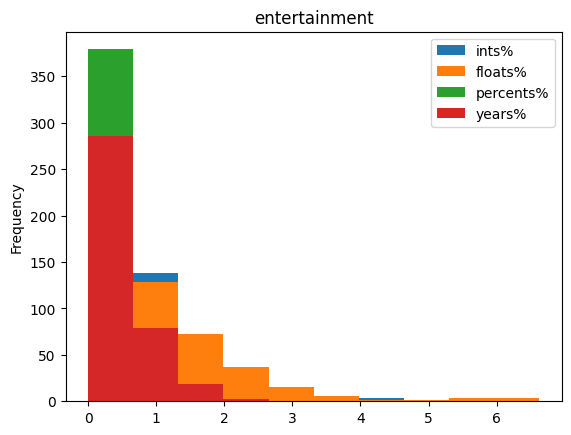

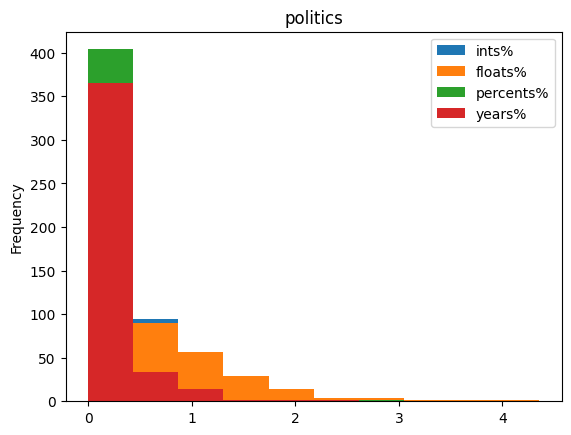

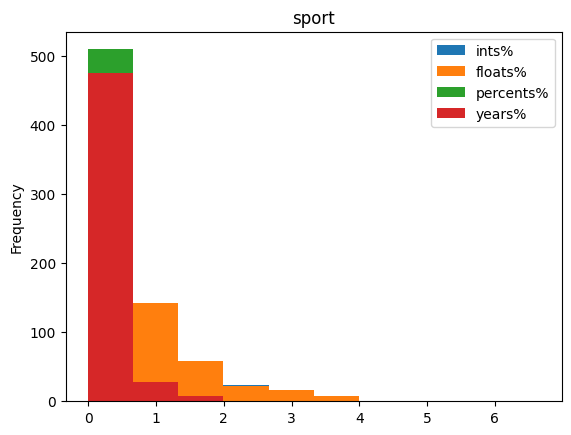

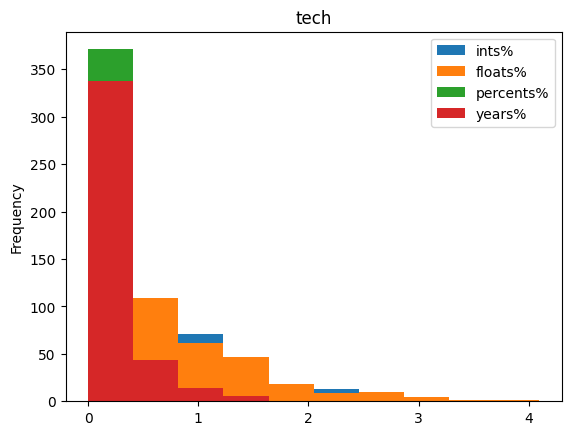

In [24]:
categories = list(df.category.drop_duplicates().values)
for category in categories:
  # filter by category
  is_category = df['category']==category
  df1 = df[is_category]
  
  nb_percent_types = [''.join([t, '%']) for t in nb_types]

  for prog, nb_type in zip(progs, nb_percent_types):
    df1[nb_type] = df1['content'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
  # df1[nb_percent_types+['content']].head()

  # df1[nb_percent_types].hist()
  ax = df1[nb_percent_types].plot(kind='hist',subplots=False,sharex=True,sharey=True,title='%s' % (category))


### 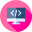 **TODO!** Is there any relationship between the percentage of numbers in an article and the content length?

Here is a way to apply custom explorations. Of course, you could also add a dedicated column and simply run again pandas profiling for a `ProfileReport(df)`

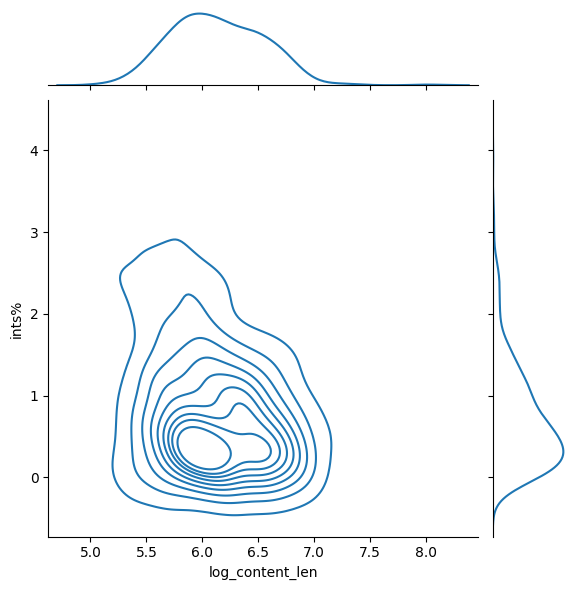

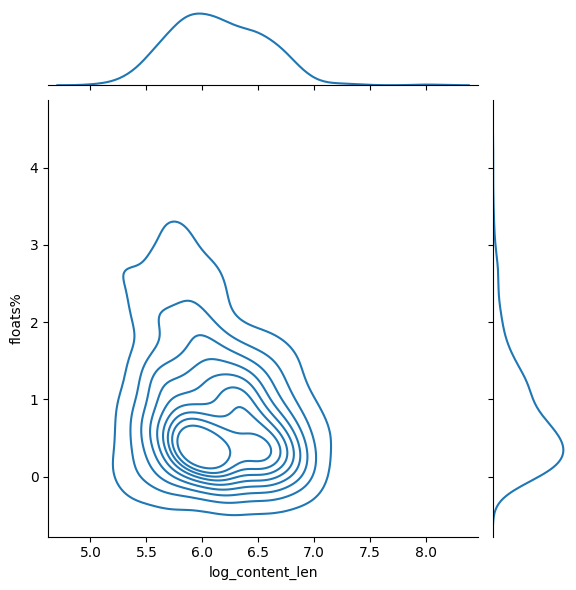

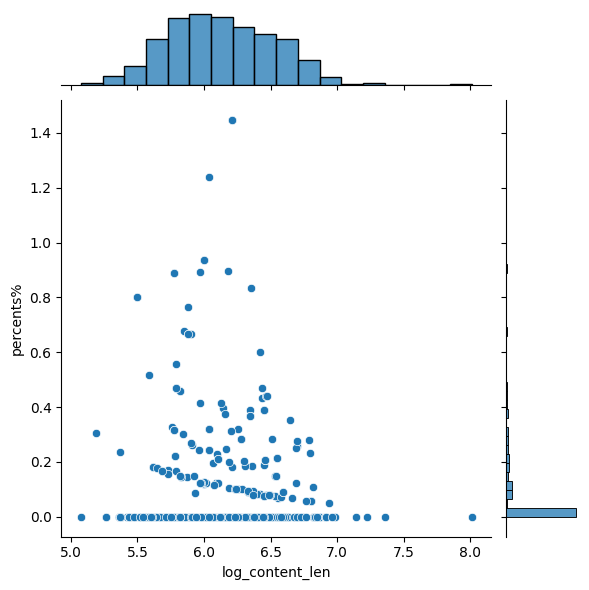

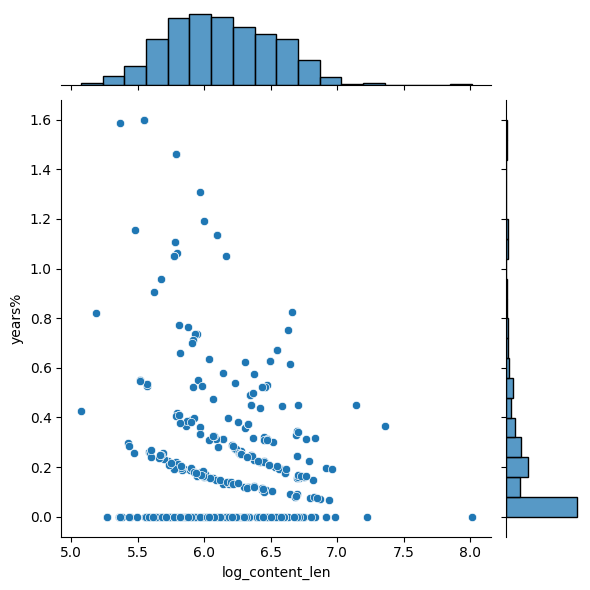

In [25]:
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
from warnings import filterwarnings
filterwarnings('ignore')

# Plotting the percentages against the corresponding log(citations)
df1['log_content_len'] = np.log(df1['content_len'].array)
for nb_type in nb_percent_types:
  # We will plot percents and years differently, as their scarcity creates a
  # matplotlib overflow when plotting a kde plot
  if nb_type in ['percents%', 'years%']:
    sns.jointplot(data=df1, x='log_content_len', y=nb_type)
    #pass
  else:
    sns.jointplot(data=df1, kind='kde', x='log_content_len', y=nb_type)#annotate(pearsonr)#
    plt.show()
  

# <font color="chillipepper">**Multiple Dataset Comparison**</font>

Let's download the second dataset.

In [26]:
from datasets import load_dataset

# Download the datasets
amazon = load_dataset('amazon_reviews_multi', 'en', split='train')
print(amazon)

Found cached dataset amazon_reviews_multi (/home/manu/.cache/huggingface/datasets/amazon_reviews_multi/en/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609)


Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 200000
})


Now we transform the Hugging Face's `Dataset` object into a Pandas dataframe and retrieve the desired languages to reduce the size.

### 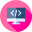 **TODO!** select only the english reviews.

In [27]:
amazon_df = amazon.to_pandas()
# is_fr_or_en = (amazon_df['language']=='fr') | (amazon_df['language']=='en') 
# amazon_df = amazon_df[is_fr_or_en]
amazon_df

review_id          product_id          reviewer_id  stars  \
0       en_0964290  product_en_0740675  reviewer_en_0342986      1   
1       en_0690095  product_en_0440378  reviewer_en_0133349      1   
2       en_0311558  product_en_0399702  reviewer_en_0152034      1   
3       en_0044972  product_en_0444063  reviewer_en_0656967      1   
4       en_0784379  product_en_0139353  reviewer_en_0757638      1   
...            ...                 ...                  ...    ...   
199995  en_0046316  product_en_0980158  reviewer_en_0629807      5   
199996  en_0956024  product_en_0954574  reviewer_en_0459072      5   
199997  en_0589358  product_en_0402982  reviewer_en_0199163      5   
199998  en_0970602  product_en_0873374  reviewer_en_0590563      5   
199999  en_0750030  product_en_0843981  reviewer_en_0775729      5   

                                              review_body  \
0       Arrived broken. Manufacturer defect. Two of th...   
1       the cabinet dot were all detached from backing...   
2       I received my first order of this product and ...   
3       This product is a piece of shit. Do not buy. D...   
4       went through 3 in one day doesn't fit correct ...   
...                                                   ...   
199995                  Cute slippers, my MIL loved them.   
199996  My 6 year old likes this and keeps him engaged...   
199997       Replaced my battery with it. Works like new.   
199998                      I like them, holding up well.   
199999  Very good for my village lights are bright I l...   

                                             review_title language  \
0       I'll spend twice the amount of time boxing up ...       en   
1                                            Not use able       en   
2                                    The product is junk.       en   
3                                  Fucking waste of money       en   
4                                                  bubble       en   
...                                                   ...      ...   
199995                         Nice and fit as advertised       en   
199996                      good to keep the kids engaged       en   
199997                                         This works       en   
199998                                         Well made.       en   
199999  Very good for my village lights are bright I l...       en   

           product_category  
0                 furniture  
1          home_improvement  
2                      home  
3                  wireless  
4                        pc  
...                     ...  
199995                shoes  
199996                  toy  
199997             wireless  
199998  industrial_supplies  
199999                 home  

[200000 rows x 8 columns]

## Compare BBC News and Amazon Reviews datasets (English only)

In [28]:
amazon_df_en = amazon_df[ amazon_df['language']=='en' ]

In [29]:
# let's save some RAM
del amazon_df

### 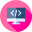 **TODO!** Compare the number of article per category in BBCNews and Amazon

In [30]:
# number of article per category
print( dict(df.drop_duplicates().groupby(df.category).size()) )
print( dict(amazon_df_en.drop_duplicates().groupby(amazon_df_en.product_category).size()) )

{'business': 510, 'entertainment': 386, 'politics': 417, 'sport': 511, 'tech': 401}
{'apparel': 15951, 'automotive': 7506, 'baby_product': 3150, 'beauty': 12091, 'book': 3756, 'camera': 2139, 'digital_ebook_purchase': 6749, 'digital_video_download': 1364, 'drugstore': 11730, 'electronics': 6186, 'furniture': 2984, 'grocery': 4730, 'home': 17679, 'home_improvement': 7136, 'industrial_supplies': 1994, 'jewelry': 2747, 'kitchen': 10382, 'lawn_and_garden': 7327, 'luggage': 1328, 'musical_instruments': 1102, 'office_product': 5521, 'other': 13418, 'pc': 6401, 'personal_care_appliances': 75, 'pet_products': 7082, 'shoes': 5197, 'sports': 8277, 'toy': 8745, 'video_games': 775, 'watch': 761, 'wireless': 15717}


### 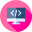 **TODO!** Compare the mean number of character per article content and title for both BBC News and Amazon

In [31]:
# mean content length (characters)
print('Mean number of character per element')
print( colored('BBCNews', 'blue'), df.content.drop_duplicates().apply(len).mean())
print( colored('Amazon ', 'yellow'),  amazon_df_en.review_body.drop_duplicates().apply(len).mean())

Mean number of character per element
BBCNews 2232.1692160611856
Amazon  179.28516843340387


In [32]:
# mean title length (characters)
print('Mean number of character per title')
print( colored('BBCNews', 'blue'), df.title.drop_duplicates().apply(len).mean())
print( colored('Amazon ', 'yellow'),  amazon_df_en.review_title.drop_duplicates().apply(len).mean())

Mean number of character per title
BBCNews 31.329198473282442
Amazon  30.306544110155308


### 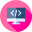 **TODO!** Concatenate both dataframes into one, with the following mapping.

In [33]:
columns_to_keep = ['review_id', 'review_body', 'review_title', 'product_category']
columns_newnames = {'review_id':'filename','review_body':'content','review_title':'title', 'product_category':'category'}
bbcamazon = pd.concat([df,amazon_df_en[columns_to_keep].rename(columns=columns_newnames)], ignore_index=True)

In [34]:
bbcamazon

category    filename  \
0                  business     001.txt   
1                  business     002.txt   
2                  business     003.txt   
3                  business     004.txt   
4                  business     005.txt   
...                     ...         ...   
202220                shoes  en_0046316   
202221                  toy  en_0956024   
202222             wireless  en_0589358   
202223  industrial_supplies  en_0970602   
202224                 home  en_0750030   

                                                    title  \
0                       Ad sales boost Time Warner profit   
1                        Dollar gains on Greenspan speech   
2                       Yukos unit buyer faces loan claim   
3                       High fuel prices hit BA's profits   
4                       Pernod takeover talk lifts Domecq   
...                                                   ...   
202220                         Nice and fit as advertised   
202221                      good to keep the kids engaged   
202222                                         This works   
202223                                         Well made.   
202224  Very good for my village lights are bright I l...   

                                                  content  title_len  \
0        Quarterly profits at US media giant TimeWarne...        6.0   
1        The dollar has hit its highest level against ...        5.0   
2        The owners of embattled Russian oil giant Yuk...        6.0   
3        British Airways has blamed high fuel prices f...        6.0   
4        Shares in UK drinks and food firm Allied Dome...        5.0   
...                                                   ...        ...   
202220                  Cute slippers, my MIL loved them.        NaN   
202221  My 6 year old likes this and keeps him engaged...        NaN   
202222       Replaced my battery with it. Works like new.        NaN   
202223                      I like them, holding up well.        NaN   
202224  Very good for my village lights are bright I l...        NaN   

        content_len  
0             421.0  
1             383.0  
2             262.0  
3             406.0  
4             264.0  
...             ...  
202220          NaN  
202221          NaN  
202222          NaN  
202223          NaN  
202224          NaN  

[202225 rows x 6 columns]

In [35]:
# let's save some RAM
del df
del amazon_df_en

### 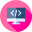 **TODO!** Add columns `content_len` and `title_len` dedicated to store the content length from better tokenized text 

Tip: use `TweetTokenizer()` from nltk and `.apply()` function from Pandas

In [36]:
from nltk.tokenize import TweetTokenizer

# Apply the tokenizer to the text and create a column dedicated to it. Same goes for the title.
tokenizer = TweetTokenizer()
bbcamazon['content_tokenized'] = bbcamazon.content.apply(lambda x: tokenizer.tokenize(x))
bbcamazon['title_tokenized'] = bbcamazon.title.apply(lambda x: tokenizer.tokenize(x))

In [37]:
# Replace text len using the tokenized values
bbcamazon['content_len_tokenized'] = bbcamazon.content_tokenized.apply(lambda x: len(x))
bbcamazon['title_len_tokenized'] = bbcamazon.title_tokenized.apply(lambda x: len(x))

In [38]:
# Recalculate the title_len and content_len for all elements
bbcamazon['content_len'] = bbcamazon.content.apply(lambda x: len(x.split(' ')))
bbcamazon['title_len'] = bbcamazon.title.apply(lambda x: len(x.split(' ')))

### 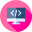 **TODO!** Add a `source` column specifying whether an article is from Amazon or BBC News

In [39]:
# Let's add an indication about the source using the filename type
bbcamazon['source'] = bbcamazon.filename.apply(lambda x: 'bbcnews' if '.txt' in x else 'amazon')

Now let's have a glimpse of our concatenated and enriched data.

In [40]:
bbcamazon.head()

category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  title_len  content_len  \
0   Quarterly profits at US media giant TimeWarne...          6          421   
1   The dollar has hit its highest level against ...          5          383   
2   The owners of embattled Russian oil giant Yuk...          6          262   
3   British Airways has blamed high fuel prices f...          6          406   
4   Shares in UK drinks and food firm Allied Dome...          5          264   

                                   content_tokenized  \
0  [Quarterly, profits, at, US, media, giant, Tim...   
1  [The, dollar, has, hit, its, highest, level, a...   
2  [The, owners, of, embattled, Russian, oil, gia...   
3  [British, Airways, has, blamed, high, fuel, pr...   
4  [Shares, in, UK, drinks, and, food, firm, Alli...   

                            title_tokenized  content_len_tokenized  \
0  [Ad, sales, boost, Time, Warner, profit]                    486   
1    [Dollar, gains, on, Greenspan, speech]                    418   
2  [Yukos, unit, buyer, faces, loan, claim]                    289   
3  [High, fuel, prices, hit, BA's, profits]                    472   
4   [Pernod, takeover, talk, lifts, Domecq]                    302   

   title_len_tokenized   source  
0                    6  bbcnews  
1                    5  bbcnews  
2                    6  bbcnews  
3                    6  bbcnews  
4                    5  bbcnews

Can you see the difference? A good tokenization can take into account several factors such as contractions: `I'm` should become `I am`. Hence, `content_len_tokenized` should almost always be higher than `content_len`.

### 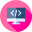 **TODO!** Check Zipf's law for BBC News and Amazon Reviews.

In [41]:
sources = bbcamazon.source.drop_duplicates().tolist()
sources

['bbcnews', 'amazon']

Counter({'the': 44534, '.': 40865, ',': 35444, 'to': 24546, '"': 20421, 'of': 19789, 'and': 17972, 'a': 17214, 'in': 16432, 'is': 8525, 'for': 8488, 'The': 8008, 'that': 7801, 'said': 7244, 'on': 7154, 'was': 6021, 'be': 5772, 'it': 5351, 'with': 5124, 'has': 4949, 'have': 4735, 'as': 4638, 'will': 4416, 'are': 4380, 'at': 4341, 'by': 4337, 'he': 4225, '-': 3818, 'from': 3474, 'not': 3401, 'I': 3250, 'Mr': 3004, 'his': 2827, 'an': 2687, 'but': 2634, 'which': 2582, 'had': 2572, 'would': 2568, 'been': 2470, 'they': 2445, 'their': 2345, 'this': 2237, '(': 2203, 'more': 2199, 'were': 2192, ')': 2184, 'its': 2176, 'also': 2102, 'who': 2037, '%': 1956, 'up': 1930, 'people': 1855, 'But': 1787, 'about': 1749, 'we': 1721, 'It': 1642, ':': 1642, 'or': 1616, "'": 1614, 'than': 1600, 'year': 1575, 'out': 1569, 'He': 1556, 'after': 1539, 'can': 1522, 'could': 1492, 'one': 1478, 'US': 1462, 'new': 1459, '£': 1392, 'all': 1342, 'over': 1340, 'there': 1239, 'last': 1233, 'first': 1233, '$': 1203, 'you

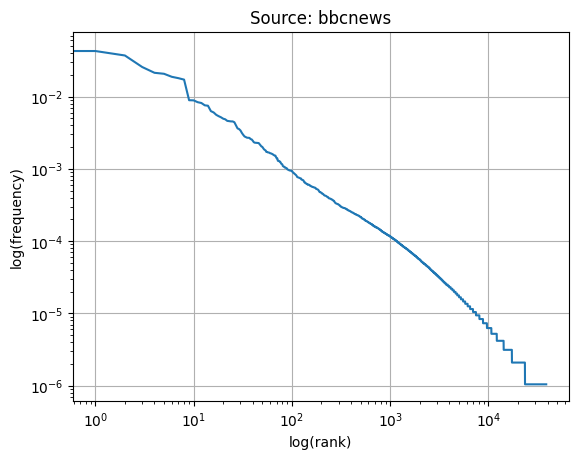

Counter({'.': 471725, 'the': 293036, 'I': 218948, 'and': 182785, 'to': 174173, ',': 171711, 'it': 167941, 'a': 159775, 'is': 98764, 'for': 89896, 'of': 87605, 'but': 69215, 'in': 68738, 'this': 68325, 'my': 67247, 'was': 66889, 'not': 66201, '!': 56362, 'on': 55527, 'that': 53103, 'with': 49286, 'The': 48703, 'have': 45206, '’': 44934, 'as': 37738, 'are': 37566, 'so': 34092, 'It': 33883, 'you': 33545, 'like': 30704, 'they': 30506, 'very': 30381, 'be': 29631, 'one': 28849, 'them': 26184, 'good': 23615, 'product': 23243, 'would': 23089, 'had': 22800, 'This': 22781, 'out': 22537, 'just': 22507, 'great': 22483, 'use': 21724, 'all': 21428, 'up': 21394, 't': 21324, 'at': 20858, 'these': 18934, 'get': 18831, 'or': 18627, 'will': 18252, 'me': 18240, 'well': 18080, 'when': 18057, 'from': 17198, 'if': 16946, 'than': 16838, 'work': 16505, 'only': 15997, 'more': 15559, 'can': 15442, 'time': 15361, 'too': 15258, 'off': 15142, 'really': 14981, 'were': 14969, 'because': 14596, 'quality': 14068, '...'

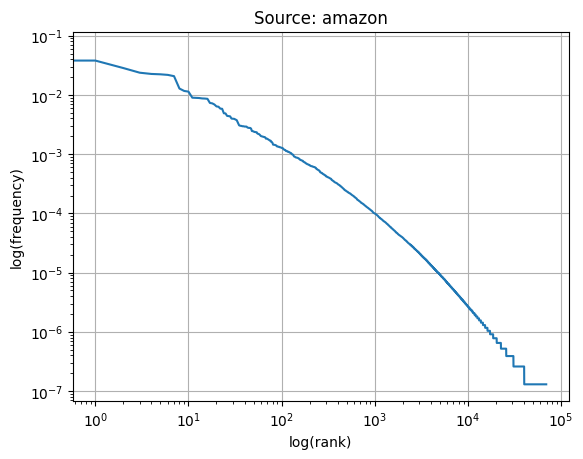

In [42]:
for source in sources:
  arr = bbcamazon[bbcamazon['source']==source].content_tokenized.array
  arr = [ x for X in arr for x in X] 
  c = Counter(arr)
  print(c)
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Source: {0}".format(source))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()

### 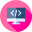 **TODO!** Create a report of the concatenated dataframe

Tip: to save some RAM, create a mini dataframe ignoring text columns such as `content_tokenized`

Now let's create a report again. As our dataset is bigger, the iframe creation should take too much time. Let's use a version without the tokenized content and tokenized title.

In [43]:
# We remove the text columns because generating the iframe takes a lot of time and RAM
mini_bbcamazon = bbcamazon.drop(columns=['content_tokenized', 'title_tokenized', 'content', 'title'])

In [44]:
# Let's create an automatic and interactive report of the BBCAmazon dataframe
profile = ProfileReport(mini_bbcamazon, title="BBC News x Amazon", html={"style": {"full_width": True}})

In [45]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Take a look at the correlations, which correlation metric is the best one to differenciate the different content and title lengths?

The Kendall's correlation shows a slight difference between content tokenized and not tokenized based on their lengths.

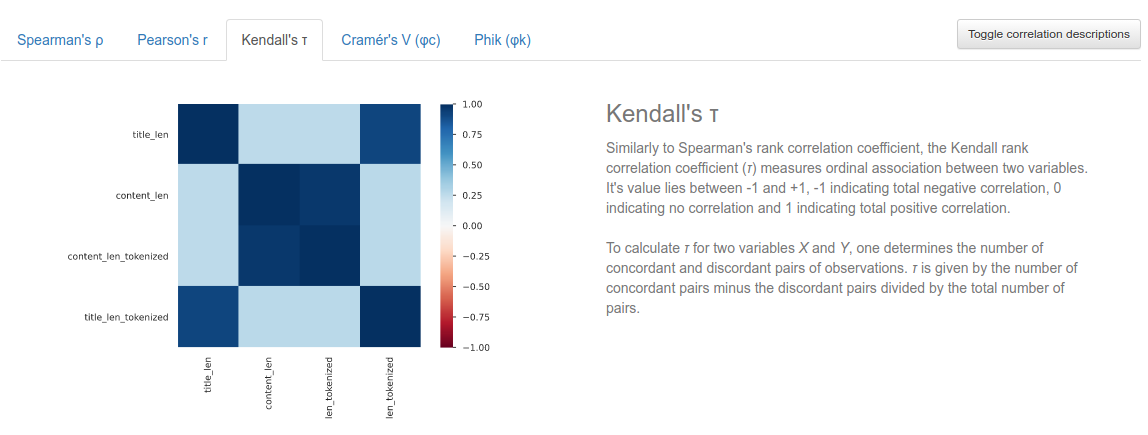

In [46]:
# let's save some RAM
del mini_bbcamazon


# <font color="chillipepper">**Classic NLP pipeline**</font>

Here you can see a classic NLP pipeline applied on titles from BBC News (in order to gain some time).

Don't hesitate to change to scope afterwards: apply it on content from BBC News for instance.


### 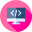 **TODO!** Re-tokenize using spacy

It is useful to take a look at spacy's [tokenizer documentation](https://spacy.io/usage/spacy-101#annotations-token)

In [47]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

# Instanciating the tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Repeating the earlier vocabulary count
arr = bbcamazon[bbcamazon.source=='bbcnews'].title.apply(lambda x: [w.text for w in tokenizer(x)]).array
arr = [ x for X in arr for x in X]
print("Vocabulary size with Spacy's tokenizer: {}".format(len(set(arr))))

# Inspecting a tokenization sample
tokenization_sample = bbcamazon[bbcamazon.source=='bbcnews'].title.head().apply(lambda x: 
                                              [w.text for w in tokenizer(x)])
print("Tokenization sample:\n {}".format(tokenization_sample))

Vocabulary size with Spacy's tokenizer: 4475
Tokenization sample:
 0    [Ad, sales, boost, Time, Warner, profit]
1      [Dollar, gains, on, Greenspan, speech]
2    [Yukos, unit, buyer, faces, loan, claim]
3    [High, fuel, prices, hit, BA's, profits]
4     [Pernod, takeover, talk, lifts, Domecq]
Name: title, dtype: object


The tokenizer doesn't seem to do better than nltk's tokenizers, in terms of vocabulary size.



# <font color="chillipepper">**Topic Modelling**</font>

In this part you don't need to do anything. Just analyze the following code as an example given to you.


### Use Gensim's LDA to compute a topic model. 


In [48]:
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
to_be_removed = list(en_stop) + list(punctuation)

tok = TreebankWordTokenizer()
# Tokenizing + removing stopwords
text_data = list(bbcamazon[bbcamazon.source=='bbcnews'].content.apply(lambda x: list(filter(lambda a: a.lower() not in to_be_removed,tok.tokenize(x)))).array)
print(text_data[0])
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=4)

[nltk_data] Downloading package stopwords to /home/manu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Quarterly', 'profits', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '1.13bn', '£600m', 'three', 'months', 'December', '639m', 'year-earlier.', 'firm', 'one', 'biggest', 'investors', 'Google', 'benefited', 'sales', 'high-speed', 'internet', 'connections', 'higher', 'advert', 'sales.', 'TimeWarner', 'said', 'fourth', 'quarter', 'sales', 'rose', '2', '11.1bn', '10.9bn.', 'profits', 'buoyed', 'one-off', 'gains', 'offset', 'profit', 'dip', 'Warner', 'Bros', 'less', 'users', 'AOL.', 'Time', 'Warner', 'said', 'Friday', 'owns', '8', 'search-engine', 'Google.', 'internet', 'business', 'AOL', 'mixed', 'fortunes.', 'lost', '464,000', 'subscribers', 'fourth', 'quarter', 'profits', 'lower', 'preceding', 'three', 'quarters.', 'However', 'company', 'said', 'AOL', "'s", 'underlying', 'profit', 'exceptional', 'items', 'rose', '8', 'back', 'stronger', 'internet', 'advertising', 'revenues.', 'hopes', 'increase', 'subscribers', 'offering', 'online', 'service', 'free', 'TimeWarner', 'internet', 

### Use PyLDAvis to visualise the topic model. What are the different topic clusters?


In [49]:
!pip install pyLDAvis

In [50]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

Topic modelling not very relevant here.